In [7]:
import pandas_datareader as pdr

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import datetime

In [32]:
df = pd.read_csv('MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-19,244.860001,245.210007,238.710007,240.449997,238.336700,29696400
1,2022-12-20,239.399994,242.910004,238.419998,241.800003,239.674835,25150800
2,2022-12-21,241.690002,245.619995,240.110001,244.429993,242.281693,23690600
3,2022-12-22,241.259995,241.990005,233.869995,238.190002,236.096542,28651700
4,2022-12-23,236.110001,238.869995,233.940002,238.729996,236.631790,21207000
...,...,...,...,...,...,...,...
246,2023-12-12,370.850006,374.420013,370.459991,374.380005,374.380005,24838300
247,2023-12-13,376.019989,377.640015,370.769989,374.369995,374.369995,30955500
248,2023-12-14,373.309998,373.760010,364.130005,365.929993,365.929993,43277500
249,2023-12-15,366.850006,372.399994,366.279999,370.730011,370.730011,78478200


In [33]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-12-19,240.449997
1,2022-12-20,241.800003
2,2022-12-21,244.429993
3,2022-12-22,238.190002
4,2022-12-23,238.729996
...,...,...
246,2023-12-12,374.380005
247,2023-12-13,374.369995
248,2023-12-14,365.929993
249,2023-12-15,370.730011


In [35]:
df['Date']

0      2022-12-19
1      2022-12-20
2      2022-12-21
3      2022-12-22
4      2022-12-23
          ...    
246    2023-12-12
247    2023-12-13
248    2023-12-14
249    2023-12-15
250    2023-12-18
Name: Date, Length: 251, dtype: object

In [38]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [40]:
df


,Date,Close
0,2022-12-19,240.449997
1,2022-12-20,241.800003
2,2022-12-21,244.429993
3,2022-12-22,238.190002
4,2022-12-23,238.729996
...,...,...
246,2023-12-12,374.380005
247,2023-12-13,374.369995
248,2023-12-14,365.929993
249,2023-12-15,370.730011


In [42]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/tmp/ipykernel_92/2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-12-19
1     2022-12-20
2     2022-12-21
3     2022-12-22
4     2022-12-23
         ...    
246   2023-12-12
247   2023-12-13
248   2023-12-14
249   2023-12-15
250   2023-12-18
Name: Date, Length: 251, dtype: datetime64[ns]

In [44]:
df.index = df.pop('Date')
df

,Close
Date,
2022-12-19,240.449997
2022-12-20,241.800003
2022-12-21,244.429993
2022-12-22,238.190002
2022-12-23,238.729996
...,...
2023-12-12,374.380005
2023-12-13,374.369995
2023-12-14,365.929993


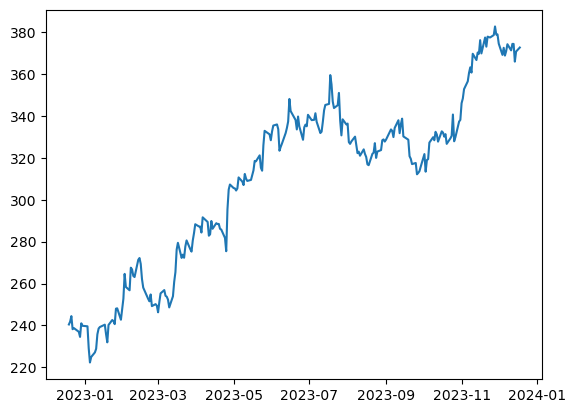

In [46]:
plt.plot(df.index, df['Close'])

In [64]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df



In [66]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

Error: Window of size 3 is too large for date 2021-03-25 00:00:00


In [68]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

AttributeError: 'NoneType' object has no attribute 'to_numpy'